In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb

## Loading Data and Performing EDA

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv', na_values='?')

In [3]:
df.head(10)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


## Summarizing Columns to find means,Avg,etc

In [4]:
df.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Identifying the Data Types in each Column

In [5]:
df.dtypes

Sample      int64
F1          int64
F2          int64
F3          int64
F4          int64
F5          int64
F6        float64
F7          int64
F8          int64
F9          int64
Class       int64
dtype: object

## Identifying Missing Values

In [6]:
df[df.isna().any(axis=1)]

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


## Replacing Missing Values with Mean

In [7]:
df.fillna(df.mean(), inplace=True)
df['F6'] = df['F6'].astype(float)

## Frequency Table

In [8]:
pd.crosstab(df.Class, df.F6)

F6,1.000000,2.000000,3.000000,3.544656,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Class,,,,,,,,,,,
2,387,21,14,14,6,10,0,1,2,0,3
4,15,9,14,2,13,20,4,7,19,9,129


## Scatter Plot of F1 to F6 one pair at a time

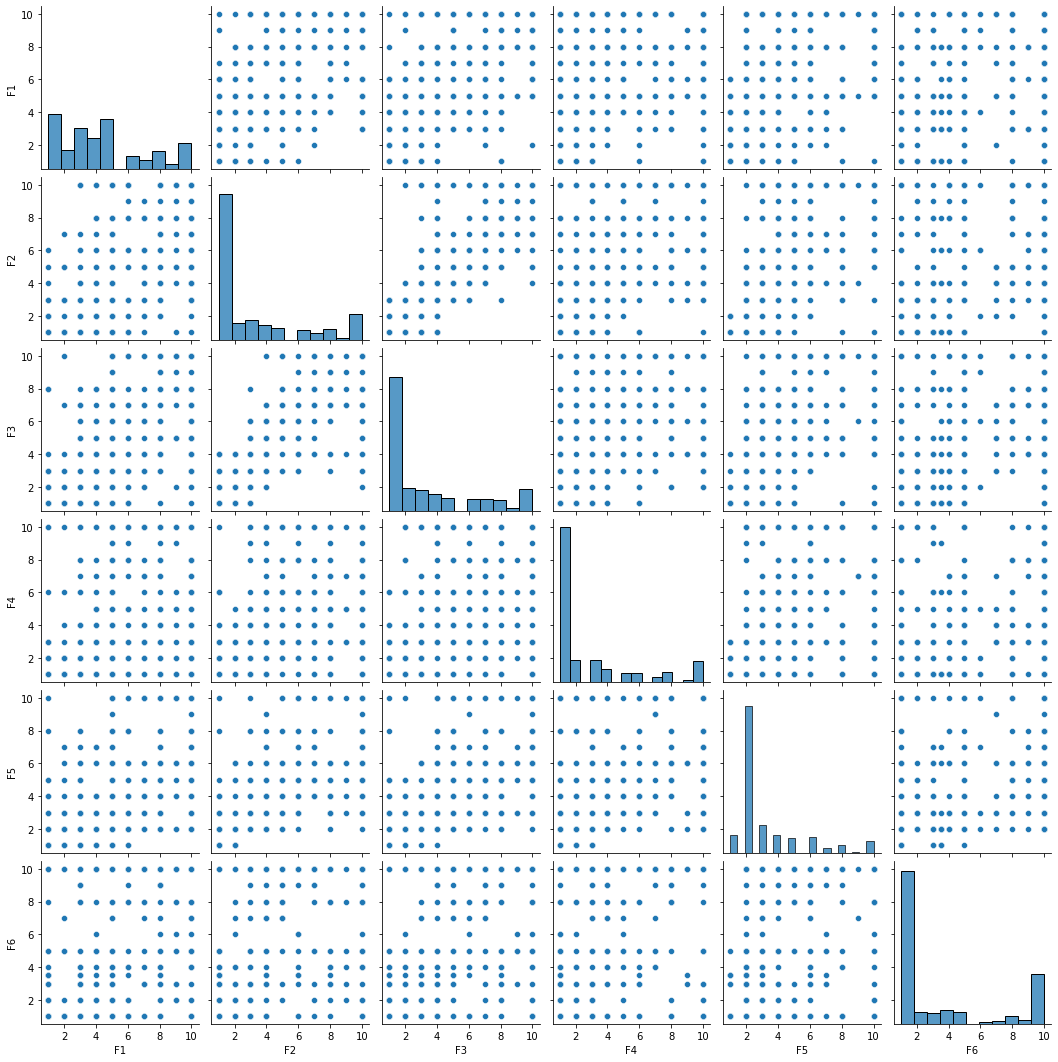

In [9]:
sb.pairplot(df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']])
plt.show()

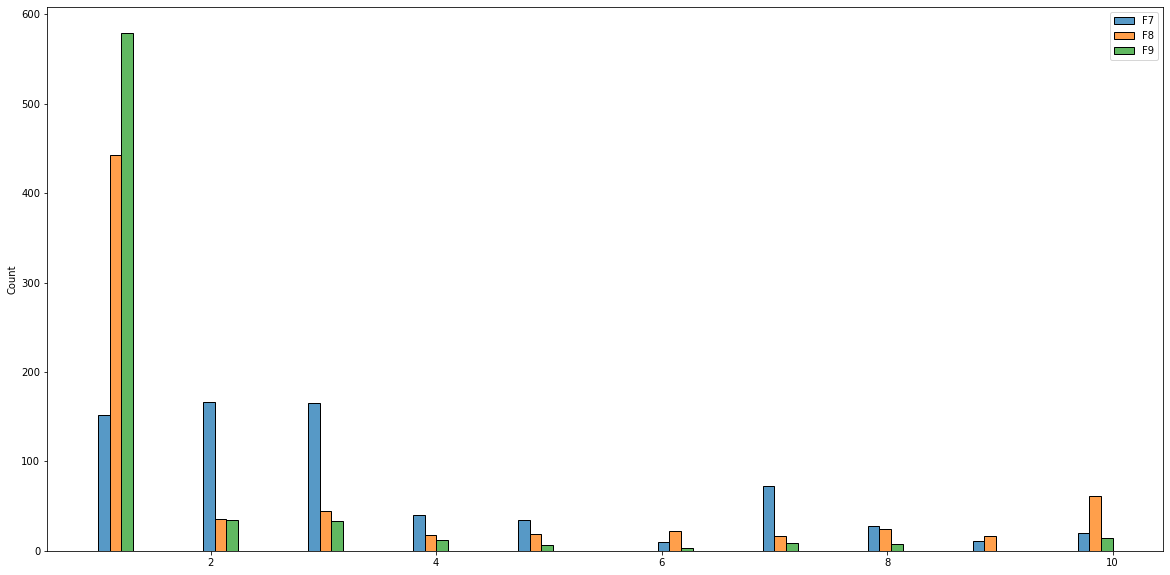

In [10]:
fig = plt.figure()
fig.set_size_inches(20, 10)
sb.histplot(df[['F7', 'F8', 'F9']], multiple='dodge')
plt.show()

## Box Plots for Columns F7,F8,F9

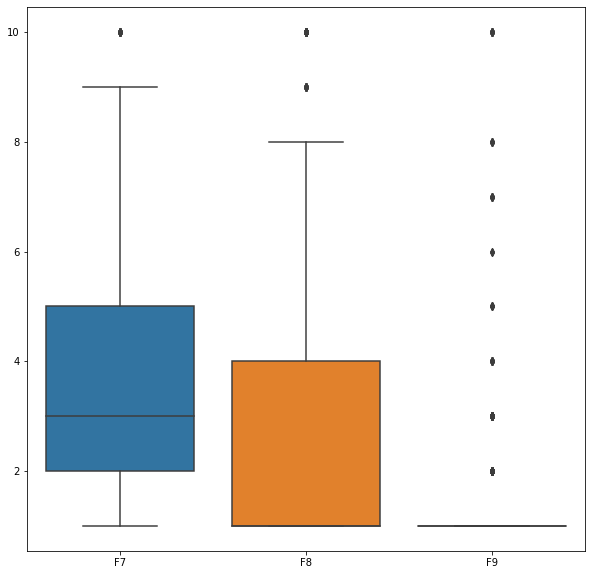

In [11]:
fig = plt.figure()
fig.set_size_inches(10, 10)
sb.boxplot(data=df[['F7', 'F8', 'F9']])
plt.show()

## Loading the data and Removing rows with missing values

In [12]:
# Reading csv file
final_data = pd.read_csv('breast-cancer-wisconsin.csv')

# Dropping rows with missing values
final_data = final_data[final_data['F6'].str.isnumeric()]

In [13]:
final_data.describe()

,Sample,F1,F2,F3,F4,F5,F7,F8,F9,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
